In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
california=fetch_california_housing()
df=pd.DataFrame(california.data,columns=california.feature_names)
df['Price'] = california.target

In [3]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


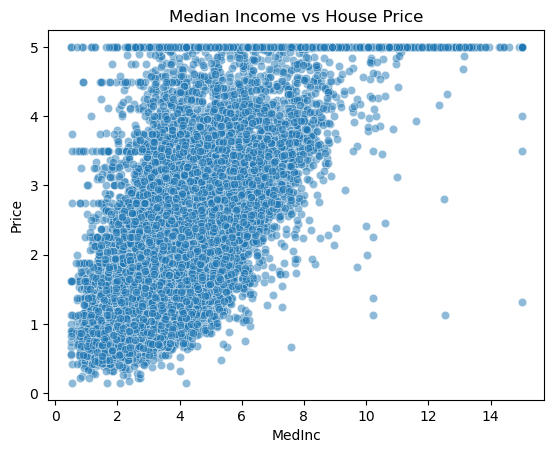

In [5]:
sns.scatterplot(df,x='MedInc',y='Price',alpha=0.5)
plt.title('Median Income vs House Price')
plt.show()

In [6]:
df.corr()['Price'] # Corelation with Price

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
Price         1.000000
Name: Price, dtype: float64

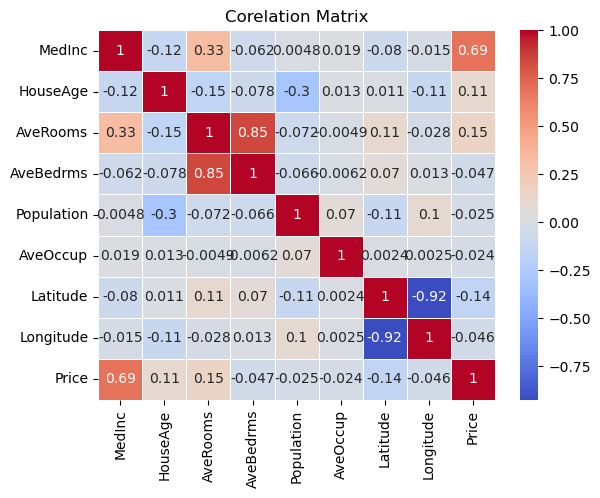

In [7]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linewidth=0.5)
plt.title('Corelation Matrix')
plt.show()

In [8]:
## Above we can see MedInc is highly corelated to price ,so we take price

In [9]:
X=df[['MedInc']]
y=df['Price']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [11]:
model=LinearRegression()

In [12]:
model.fit(X_train,y_train)

LinearRegression()

In [13]:
ypred=model.predict(X_test)

In [14]:
print(f"Linear model: Price = MedInc *{model.coef_[0]:.2f}+{model.intercept_:.2f}")

Linear model: Price = MedInc *0.42+0.44


In [15]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error

In [16]:
r2_score(y_test,ypred)

0.45885918903846656

In [17]:
mean_squared_error(y_test,ypred)

0.7091157771765549

In [18]:
root_mean_squared_error(y_test,ypred)

0.8420901241414455

In [19]:
X=df.drop('Price',axis=1)
y=df['Price']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [21]:
model.fit(X_train,y_train)

LinearRegression()

In [22]:
ypred=model.predict(X_test)

In [23]:
r2_score(y_test,ypred)

0.5757877060324514

In [24]:
# Residual
residual=pd.DataFrame({'Actual':y_test,'Predict':ypred,'residual':y_test-ypred})

In [25]:
residual.head()

Actual   Predict  residual
20046  0.47700  0.719123 -0.242123
3024   0.45800  1.764017 -1.306017
15663  5.00001  2.709659  2.290351
20484  2.18600  2.838926 -0.652926
9814   2.78000  2.604657  0.175343

Text(0.5, 1.0, 'Residual vs Predicted')

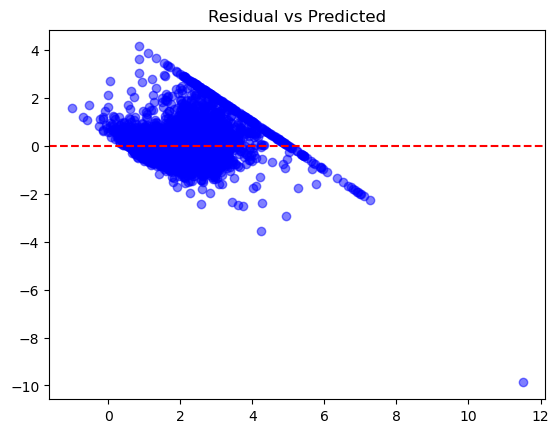

In [26]:
#Scatter plot Residuals
plt.scatter(residual['Predict'],residual['residual'],color='blue',alpha=0.5)
plt.axhline(y=0,color='r',linestyle='--')
plt.title('Residual vs Predicted')

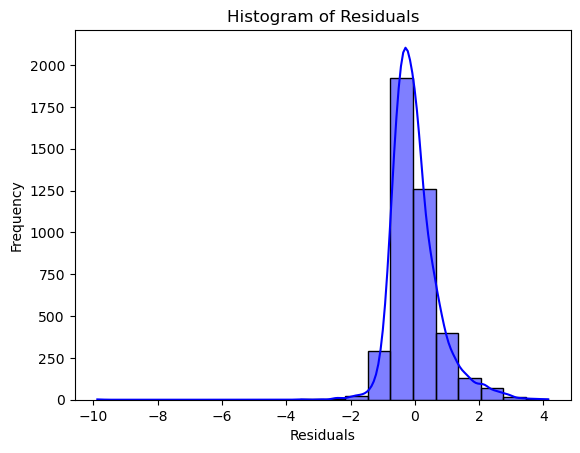

In [27]:
## Histogram Residuals
sns.histplot(residual['residual'],bins=20,kde=True,color='blue')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

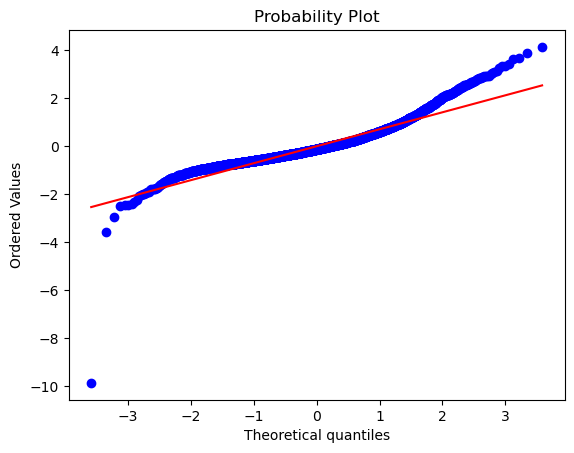

In [28]:
import scipy.stats as stats
import pylab
stats.probplot(residual['residual'],plot=pylab,dist='norm')
pylab.show()

#### Interpret Residual Analysis
- Linearity : Scatter plot shows no strong curve -assumption holds decently
- Constant Variance : Slight fanning at higher prices - mild heteroscendasticity (Variance Grows)
- Normality : Histogram and Q-Q show
-  Takeway : Models okay but non=constant variance could be issue

## Standardization

## 1. Normalization

Normalization is the process of scaling individual data points to fit within a specific range, typically [0, 1] or [-1, 1]. The formula for normalizing a value \( x \) is:

$$
x' = \frac{x - \min(x)}{\max(x) - \min(x)}
$$

## 2. Standardization (Z-score Normalization)

Standardization transforms data into a distribution with a mean of 0 and a standard deviation of 1. The formula for standardizing a value \( x \) is:

$$
z = \frac{x - \mu}{\sigma}
$$
Standardization is often used in algorithms that assume the data is normally distributed, such as:
- **Linear Regression**
- **Logistic Regression**
- **Principal Component Analysis (PCA)**
- **Support Vector Machines (SVM)**


# Key Differences Between Normalization and Standardization

| **Aspect**               | **Normalization**                                | **Standardization (Z-score Normalization)**   |
|--------------------------|--------------------------------------------------|-----------------------------------------------|
| **Definition**            | Scaling data to a specific range, typically [0, 1] or [-1, 1]. | Transforming data to have a mean of 0 and a standard deviation of 1. |
| **Formula**               | $$ x' = \frac{x - \min(x)}{\max(x) - \min(x)} $$ | $$ z = \frac{x - \mu}{\sigma} $$             |
| **Effect on Data**        | Data values are scaled between a defined range, often [0, 1]. | Data values are centered around 0 with unit variance. |
| **Use Cases**             | Used when data has different units or scales, like in neural networks or KNN. | Used when data is Gaussian (normally distributed) or requires standardization for algorithms like PCA or SVM. |
| **Sensitivity to Outliers** | Sensitive to outliers, as they affect the minimum and maximum values. | Less sensitive to outliers compared to normalization. |
| **Range of Transformed Data** | Typically [0, 1] or [-1, 1].                  | Data is not restricted to a specific range. Can go below 0 or above 1. |
| **When to Use**           | When data needs to be on a consistent scale, like in neural networks or KNN. | When you need to ensure a distribution with a mean of 0 and standard deviation of 1, often for linear models or PCA. |


## Cross Validation

Cross-validation is a technique used to assess how well a machine learning model generalizes to an independent dataset. It involves partitioning the data into subsets, training the model on some of them, and testing it on the others. This process helps ensure that the model’s performance is not dependent on a single partition of the data.

### Types of Cross-Validation

1. **K-Fold Cross-Validation**
   - The dataset is split into \( k \) smaller subsets or "folds."
   - For each fold, the model is trained on \( k-1 \) folds and tested on the remaining fold.
   - This process is repeated \( k \) times, with each fold serving as the test set exactly once.
   - The final performance is averaged over the \( k \) iterations to give a more robust estimate of model performance.

   **Formula for K-Fold Cross-Validation Error**:
   $$ \text{CV Error} = \frac{1}{k} \sum_{i=1}^{k} \text{Error}_i $$

2. **Stratified K-Fold Cross-Validation**
   - Similar to K-Fold, but ensures that each fold has approximately the same percentage of samples for each class, especially important for imbalanced datasets.

3. **Leave-One-Out Cross-Validation (LOOCV)**
   - A special case of K-Fold where \( k \) is equal to the number of data points in the dataset. For each iteration, one data point is used for testing, and the remaining ones are used for training.
   - While computationally expensive, LOOCV provides a very thorough evaluation of the model.

4. **Leave-P-Out Cross-Validation**

5. 
## Cross Validation: Applications and Usage

Cross-validation is essential in many machine learning workflows. Here are some common applications and use cases for cross-validation:

### 1. **Model Performance Evaluation**
Cross-validation is often used to evaluate the performance of machine learning models. Instead of relying on a single train-test split, cross-validation gives a more reliable estimate by evaluating the model on multiple train-test splits.

- **Application**: In algorithms like **Linear Regression**, **Logistic Regression**, **Decision Trees**, and **SVM**, cross-validation helps ensure that the model is not overfitting to the training data and provides an unbiased estimate of its performance on unseen data.

### 2. **Hyperparameter Tuning**
Cross-validation is commonly used in conjunction with **hyperparameter optimization** techniques like **Grid Search** or **Random Search**. It helps evaluate the model's performance for different hyperparameter combinations, ensuring that the selected set of parameters leads to the best generalization performance.

- **Application**: When tuning the hyperparameters of a **Random Forest**, **Support Vector Machine (SVM)**, or **Neural Network**, cross-validation helps in selecting the best model configuration.

### 3. **Imbalanced Data**
In datasets with imbalanced classes (e.g., fraud detection, disease prediction), the model might favor the majority class. Using **Stratified K-Fold Cross-Validation** ensures that the model sees the same proportion of each class in every fold, leading to more accurate and balanced performance metrics.

- **Application**: Cross-validation is particularly helpful in applications like **fraud detection**, **medical diagnosis**, or any other domain where the target classes are imbalanced.

### 4. **Feature Selection**
Cross-validation can be used to assess the impact of different feature subsets on model performance. This process is valuable when selecting the most informative features for the model, which can lead to better generalization and faster training.

- **Application**: **Recursive Feature Elimination (RFE)** can be combined with cross-validation to evaluate which features should be kept when building a predictive model.

### 5. **Time Series Forecasting (Time Series Cross-Validation)**
For time-dependent data (e.g., stock market predictions, weather forecasting), standard cross-validation methods like K-Fold may not work because they do not respect the temporal order of the data. **Time Series Cross-Validation** methods such as **Walk-Forward Validation** address this issue by ensuring that training only happens with past data and testing with future data.

- **Application**: Used for time-dependent data such as **financial forecasting**, **weather prediction**, or any **time series analysis** where the chronological order of observations is important.

### 6. **Ensuring Model Robustness**
Cross-validation provides a way to check the stability of a model’s performance across different data subsets. This can help prevent overfitting, where the model works well on one dataset but poorly on another.

- **Application**: In **medical image analysis**, **speech recognition**, or any application where robustness and generalizability are critical, cross-validation helps ensure the model does not memorize training data but generalizes well to new, unseen data.

### 7. **Small Dataset Scenarios**
For small datasets where every data point is important, cross-validation makes better use of the available data by ensuring that every data point is used for both training and testing. This helps mitigate the risk of overfitting and provides a more accurate performance estimate.

- **Application**: Cross-validation is particularly helpful when working with small datasets, like in **genomic data analysis**, **medical research**, or other fields with limited labeled data.

### 8. **Model Selection and Comparison**
Cross-validation can be used to compare multiple models to choose the one with the best performance. By evaluating each model across multiple train-test splits, it allows for an unbiased comparison of their generalization capabilities.

- **Application**: When comparing different models like **Decision Trees vs. Random Forest vs. Support Vector Machines**, cross-validation ensures the model with the best generalization ability is chosen.

### 9. **Neural Networks and Deep Learning**
In deep learning applications, cross-validation helps prevent overfitting by evaluating the model across different splits of the data, ensuring the model generalizes well to unseen data. It can be combined with **early stopping** during training to stop the model when its performance on the validation set starts to degrade.

- **Application**: Used in **im



In [69]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=2, noise=20)
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()
# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.75567845 0.84123495 0.87066142 0.76540855 0.88865235]
Average score: 0.8243271422365153


In [71]:
california=fetch_california_housing()
df=pd.DataFrame(california.data,columns=california.feature_names)
df['Price'] = california.target

In [73]:
X=df.drop('Price',axis=1)
y=df['Price']

In [87]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()
# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.57578771 0.61374822 0.60856043 0.62126494 0.5875292 ]
Average score: 0.6013781013684615
